### EXPLORATORY DATA ANALYSIS (EDA)

In the EDA we are going to do some assumptions, do a comprehension of the dataset and check missing values

In [4]:
#Display the first few rows
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


Lets check some information in this dataset

In [5]:
#Display the summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


In [6]:
#Display the data type of the data
df.dtypes

Gender              object
age                  int64
education           object
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke     object
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
Heart_ stroke       object
dtype: object

In [7]:
#Show the number of missing (NaN values) per column
print(df.isnull().sum())

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Heart_ stroke        0
dtype: int64


In [8]:
#Show number of unique values per column
df.nunique()

Gender                2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1363
heartRate            73
glucose             143
Heart_ stroke         2
dtype: int64

##### In a previous analyse is possible to notice:

In data.info we can see in this dataset is distributed in 4238 entries and 16 columns. And there are data with different type, being float64(8), int64(4), object(4).

In df.type we observed there are float (cigsPerDay,BPMeds, totChol, sysBP, diaBP, BMI, heartRate, glucose), int64 (age, currentSmoker, prevalentHyp, diabetes), object (Gender, education, prevalentStroke, Heart_ stroke).

isnull().sum() shows the columns education, cigsPerDay, BPMeds, totChol, BMI, heartRate, glucose presents considerable number of missing values in this dataset.

It is also possible to see in df.nunuque() this dataset is not in balance, considering the columns do not have the same number of information.

For this project the column education is not relevant, we are goint to deleate it.
___

We are going to separate our categorical, binomial and continuous columns. 
We do this proccess to prepare it type of data before perform the models and also to normalise them.

#### Now we are going to investigate the dataset to get some insigts
* Make some plots
* Check Correlation


Let us check the number of Heart stroke vs. non-Heart stroke cases in the data set

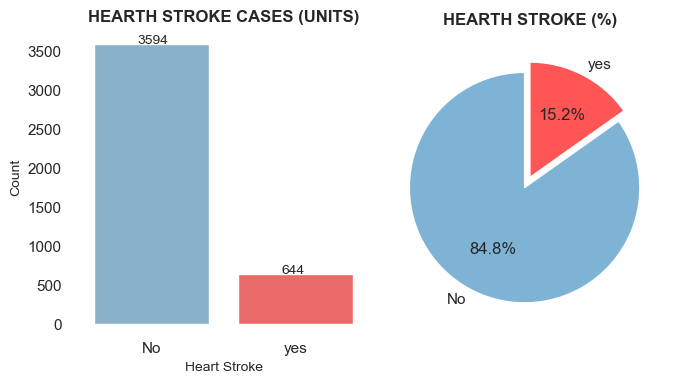

In [23]:
# Set white background
sns.set_style("whitegrid")

# Define colors
colors = ['#7FB3D5', '#FF5555']
sns.set_palette(colors)

# Figure with two plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 4))
fig.patch.set_facecolor('white')  # Set background color for the figure

# Plot for Heart Stroke Cases
ax1 = sns.countplot(x="Heart_ stroke", data=df, order=df['Heart_ stroke'].value_counts().index, ax=axes[0])
#, width=0.7)
ax1.set_title('HEARTH STROKE CASES (UNITS)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Heart Stroke', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
ax1.grid(False)

# Remove border around the bar plot
for spine in ax1.spines.values():
    spine.set_visible(False)

# Display the count values on the bars
for p in ax1.patches:
    ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.30, p.get_height() + 8), fontsize=10)

# Plot Pie chart with percentual for Heart Stroke
ax2 = plt.subplot(1, 2, 2)
df['Heart_ stroke'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax2, startangle=90, explode=(0.1, 0))
ax2.set_title('HEARTH STROKE (%)', fontsize=12, fontweight='bold')
ax2.set_ylabel('')

# Set background color for the subplot
ax2.set_facecolor('white')

# Show plot
plt.tight_layout()
plt.show()

In the graphic above the number of patients that did not have a heart stroke is 84.8% it is way greater comparated with patients that had a hearth stroke 15.2%. 

In this plot is also possible to observe our column is imbalance, considering there is a relevant difference between the number of cases and it might bring some inconsistence when apply the models. 

We are going to add some synthetic data in our training to balance our target variable

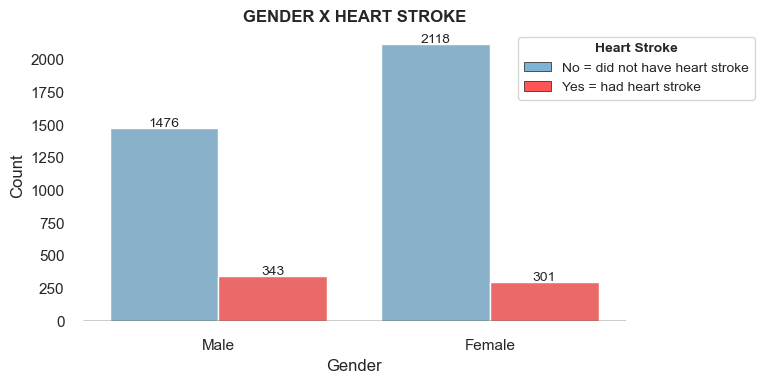

In [24]:
# Set white background
sns.set_style("whitegrid")

# Define colors
colors = ['#7FB3D5', '#FF5555']
sns.set_palette(colors)

# Bar chart for Gender vs Heart Stroke
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Gender', hue='Heart_ stroke', data=df)
#, width=0.7)  
ax.set_title('GENDER X HEART STROKE', fontsize=12, fontweight='bold')
ax.set_xlabel('Gender', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Add a line from y-axis to x-axis
plt.axhline(0, color='black', linewidth=1)

# Remove borders and grid
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

# Display the count values on the bars
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 8),
                ha='center', fontsize=10)

# Create a legend 
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color, ec="k", lw=0.5, label=label) for color, label in zip(colors, ['No = did not have heart stroke', 'Yes = had heart stroke'])]
legend = plt.legend(handles=legend_handles, loc='upper right', bbox_to_anchor=(1.25, 1), title='Heart Stroke', fontsize=10, frameon=True, facecolor='white')
legend.set_title('Heart Stroke', prop={'size': 10, 'weight': 'bold'})

# Adjust layout 
plt.tight_layout()
plt.show()

The plot above demonstrate there are more Male cases of hearth stroke being 343 case versus 301 cases for women

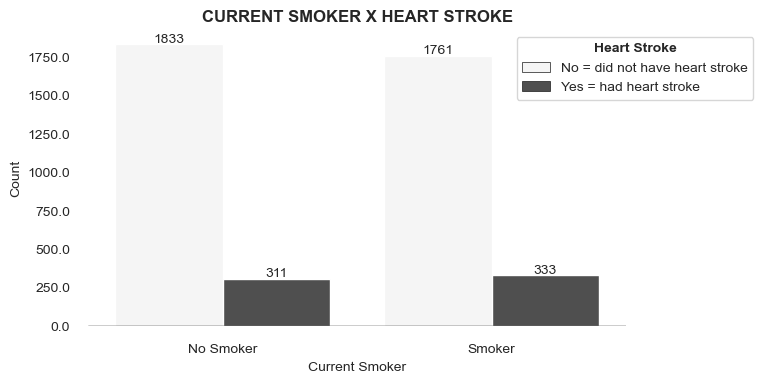

In [25]:
# Define colors
colors = ['#F5F5F5', '#4F4F4F']
sns.set_palette(colors)

# Bar chart for Smoking vs Heart Stroke
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='currentSmoker', hue='Heart_ stroke', data=df)
#, width=0.7)  
ax.set_title('CURRENT SMOKER X HEART STROKE', fontsize=12, fontweight='bold')
ax.set_xlabel('Current Smoker', fontsize=10)
ax.set_ylabel('Count', fontsize=10)

# Add a line from y-axis to x-axis
plt.axhline(0, color='black', linewidth=1)

# Remove borders and grid
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

# Display the count values on the bars
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 8),
                ha='center', fontsize=10)

# Create a legend 
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color, ec="k", lw=0.5, label=label) for color, 
                  label in zip(colors, ['No = did not have heart stroke', 'Yes = had heart stroke'])]
legend = plt.legend(handles=legend_handles, loc='upper right', bbox_to_anchor=(1.25, 1), 
                    title='Heart Stroke', fontsize=10, frameon=True, facecolor='white')
legend.set_title('Heart Stroke', prop={'size': 10, 'weight': 'bold'})

# Replace labels
ax.set_xticklabels(['No Smoker', 'Smoker'], fontsize=10)
ax.set_yticklabels(ax.get_yticks(), fontsize=10)  # Set font size for y-axis labels

# Adjust layout 
plt.tight_layout()
plt.show()

In this plot show the number of heart stroke for No smoker and Smoker, there is slightly different between them which people that had the habit of smoke were more susceptible to have hearth stroke being 333 cases of heart stroke versos 311 case for no smokers

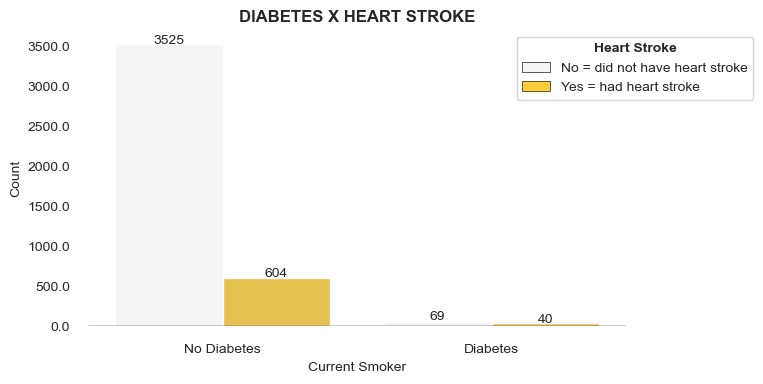

In [26]:
# Define colors
colors = ['#F5F5F5', '#FFCE38']
sns.set_palette(colors)

# Bar chart for Smoking vs Heart Stroke
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='diabetes', hue='Heart_ stroke', data=df)
#, width=0.7)  
ax.set_title('DIABETES X HEART STROKE', fontsize=12, fontweight='bold')
ax.set_xlabel('Current Smoker', fontsize=10)
ax.set_ylabel('Count', fontsize=10)

# Add a line from y-axis to x-axis
plt.axhline(0, color='black', linewidth=1)

# Remove borders and grid
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

# Display the count values on the bars
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 8),
                ha='center', fontsize=10)

# Create a legend 
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color, ec="k", lw=0.5, label=label) for color, 
                  label in zip(colors, ['No = did not have heart stroke', 'Yes = had heart stroke'])]
legend = plt.legend(handles=legend_handles, loc='upper right', bbox_to_anchor=(1.25, 1), 
                    title='Heart Stroke', fontsize=10, frameon=True, facecolor='white')
legend.set_title('Heart Stroke', prop={'size': 10, 'weight': 'bold'})

# Replace labels
ax.set_xticklabels(['No Diabetes', 'Diabetes'], fontsize=10)
ax.set_yticklabels(ax.get_yticks(), fontsize=10)  # Set font size for y-axis labels

# Adjust layout 
plt.tight_layout()
plt.show()

Patients which did not have diabetes had a hight level of heart stroke, and almost all of the patients that have diabetes are more likeable to get a heart strokePatients which did not have diabetes had a hight level of heart stroke, and almost all of the patients that have diabetes are more likeable to get a heart stroke

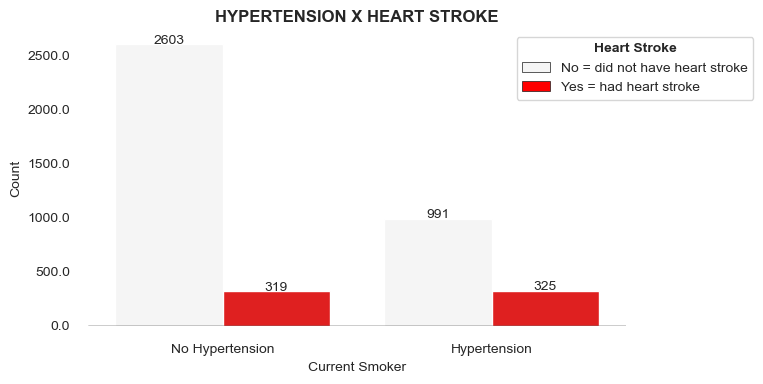

In [27]:
# Define colors
colors = ['#F5F5F5', '#FF0000']
sns.set_palette(colors)

# Bar chart for Smoking vs Heart Stroke
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='prevalentHyp', hue='Heart_ stroke', data=df)
                   #, width=0.7)  
ax.set_title('HYPERTENSION X HEART STROKE', fontsize=12, fontweight='bold')
ax.set_xlabel('Current Smoker', fontsize=10)
ax.set_ylabel('Count', fontsize=10)

# Add a line from y-axis to x-axis
plt.axhline(0, color='black', linewidth=1)

# Remove borders and grid
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

# Display the count values on the bars
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 8),
                ha='center', fontsize=10)

# Create a legend 
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color, ec="k", lw=0.5, label=label) for color, 
                  label in zip(colors, ['No = did not have heart stroke', 'Yes = had heart stroke'])]
legend = plt.legend(handles=legend_handles, loc='upper right', bbox_to_anchor=(1.25, 1), 
                    title='Heart Stroke', fontsize=10, frameon=True, facecolor='white')
legend.set_title('Heart Stroke', prop={'size': 10, 'weight': 'bold'})

# Replace labels
ax.set_xticklabels(['No Hypertension', 'Hypertension'], fontsize=10)
ax.set_yticklabels(ax.get_yticks(), fontsize=10)  # Set font size for y-axis labels

# Adjust layout 
plt.tight_layout()
plt.show()

The number of patients without hypertension are greater, but it seems that having hypertension might contribute for heart stroke. Is similar to diabetes vs heart stroke.

#### ______________________________________________________________________________________________________________

##### * Correlation

We are going to check the Person Correlation for the continuous data to understand the strength and direction of the linear relationship between pairs of continuous variables

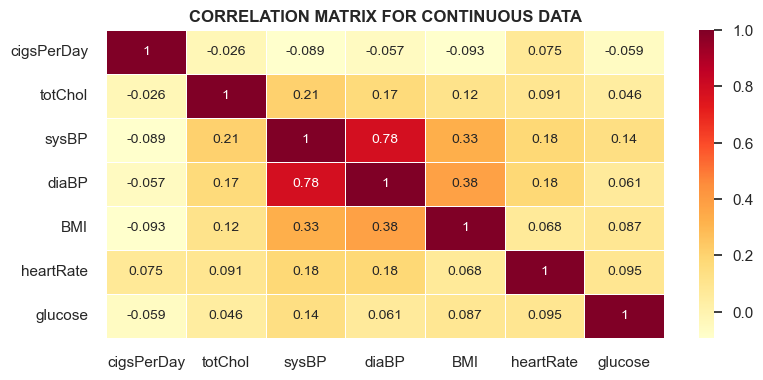

In [28]:
# Correlation between continuous data
data = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
df_continuos = pd.DataFrame(data)
continuous_columns = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

#Correlation Matrix
correlation_matrix = df[continuous_columns].corr()

# Plot Heatmap
plt.figure(figsize=(9, 4))
cmap = sns.color_palette("YlOrRd", as_cmap=True)
annot_font_size = 10
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, linewidths=0.5, annot_kws={"size": annot_font_size})
plt.title('CORRELATION MATRIX FOR CONTINUOUS DATA', fontsize=12, fontweight='bold')
plt.show()